In [58]:
import pickle
from importlib import import_module

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import datasets
from sklearn_evaluation import plot

In [28]:
upstream = None
product = None

model_type = None
n_estimators = None
criterion = None
max_depth= None

In [34]:
X, y = datasets.make_classification(n_samples=10000,
                                    n_features=20,
                                    n_informative=5,
                                    n_classes=2,
                                    flip_y=0.1,
                                    class_sep=0.5,
                                    random_state=0)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [36]:
module, _, attribute = model_type.rpartition('.')
class_ = getattr(import_module(module), attribute)

clf = class_(n_estimators=n_estimators,
             criterion=criterion,
             max_depth=max_depth)

In [37]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=1)

In [43]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

In [53]:
cr = classification_report(y_test, y_pred, output_dict=True)

In [60]:
n_estimators

1

In [61]:
criterion

'gini'

In [62]:
max_depth

3

In [59]:
accuracy_score(y_test, y_pred)

0.6427272727272727

In [54]:
cr['1']['precision']

0.5944816053511706

In [55]:
cr['1']['recall']

0.8718577559779277

In [57]:
cr['1']['f1-score']

0.7069351230425055

<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

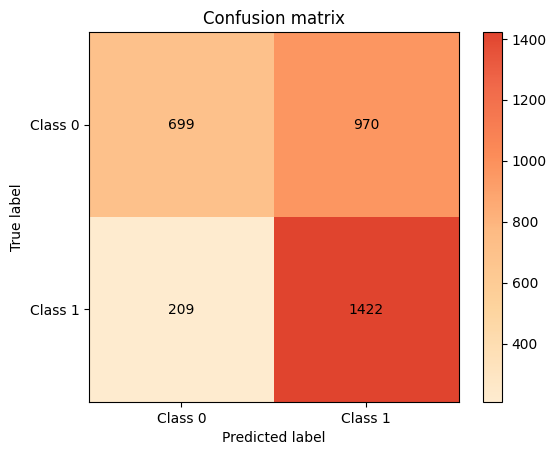

In [45]:
plot.confusion_matrix(y_test, y_pred)

<AxesSubplot: title={'center': 'Classification report'}, xlabel='Metric', ylabel='Class'>

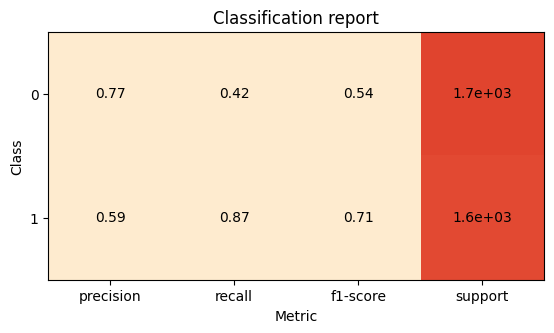

In [46]:
plot.classification_report(y_test, y_pred)

<AxesSubplot: title={'center': 'Precision-Recall'}, xlabel='Recall', ylabel='Precision'>

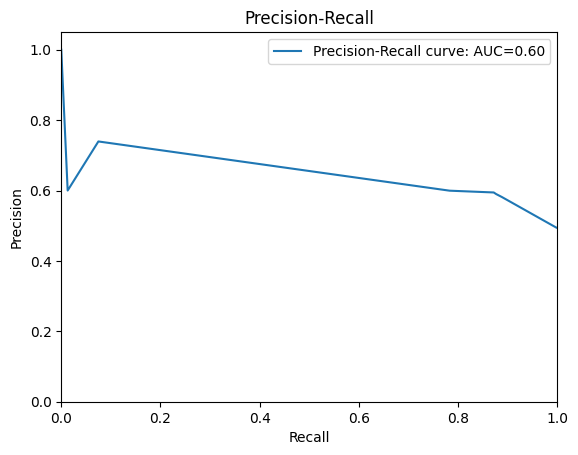

In [48]:
plot.precision_recall(y_test, y_score)

In [19]:
with open(product['model'], 'wb') as f:
    pickle.dump(clf, f)

TypeError: 'NoneType' object is not subscriptable